In [1]:
import os
import nibabel as nib

import preprocessing as pre

In [2]:
dataset_path = '../ACDC/database'
testing_folder = os.path.join(dataset_path, 'testing')
training_folder = os.path.join(dataset_path, 'training')

nb_training = len(os.listdir(training_folder))
nb_testing = len(os.listdir(testing_folder))

# Pre-processing training images
images_train_ED, masks_train_ED, images_train_ES, masks_train_ES = pre.preprocess_files_acdc(training_folder, nb_training)

# Pre-processing testing images
images_test_ED, masks_test_ED, images_test_ES, masks_test_ES = pre.preprocess_files_acdc(testing_folder, nb_testing, test=True)

In [3]:
print('----------- Training dataset -----------')
print('Number of images ED:\t{}'.format(len(images_train_ED)))
print('Number of masks ED:\t{}'.format(len(masks_train_ED)))
print('Number of images ES:\t{}'.format(len(images_train_ES)))
print('Number of masks ES:\t{}'.format(len(masks_train_ES)))

print('\n----------- Testing dataset -----------')
print('Number of images ED:\t{}'.format(len(images_test_ED)))
print('Number of masks ED:\t{}'.format(len(masks_test_ED)))
print('Number of images ES:\t{}'.format(len(images_test_ES)))
print('Number of masks ES:\t{}'.format(len(masks_test_ES)))

----------- Training dataset -----------
Number of images ED:	100
Number of masks ED:	100
Number of images ES:	100
Number of masks ES:	100

----------- Testing dataset -----------
Number of images ED:	50
Number of masks ED:	50
Number of images ES:	50
Number of masks ES:	50


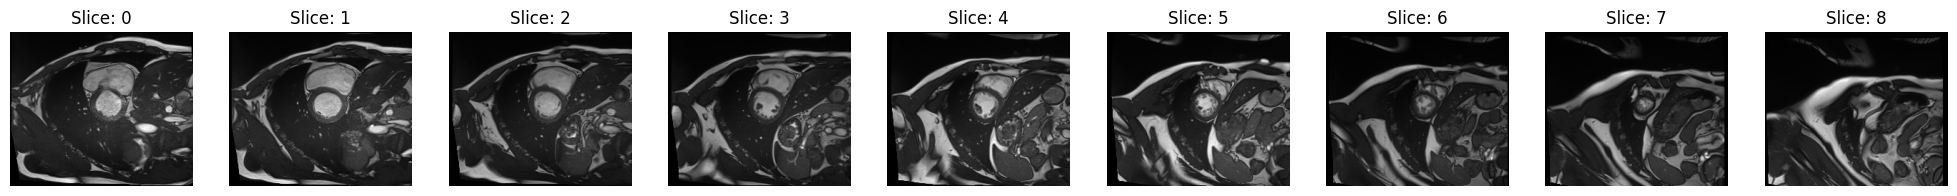

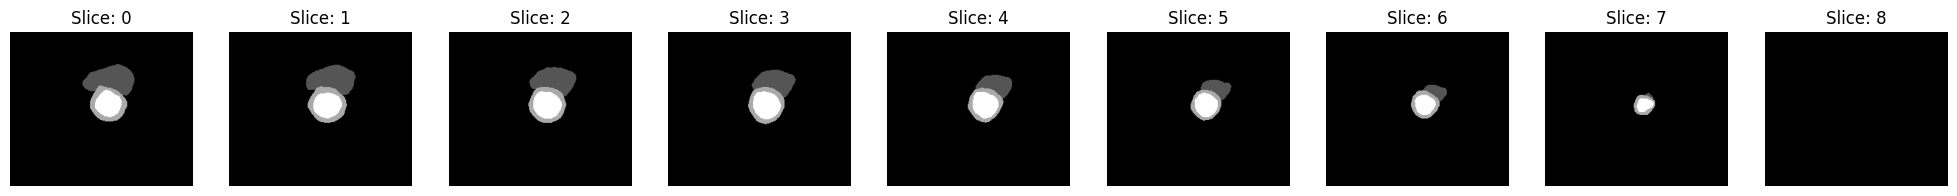

In [4]:
# Show images and masks of training dataset
patient = 60

image = pre.nii_reader(images_train_ED[patient])
mask = pre.nii_reader(masks_train_ED[patient])

pre.visualize_image_mask(image, mask, image.shape[2])

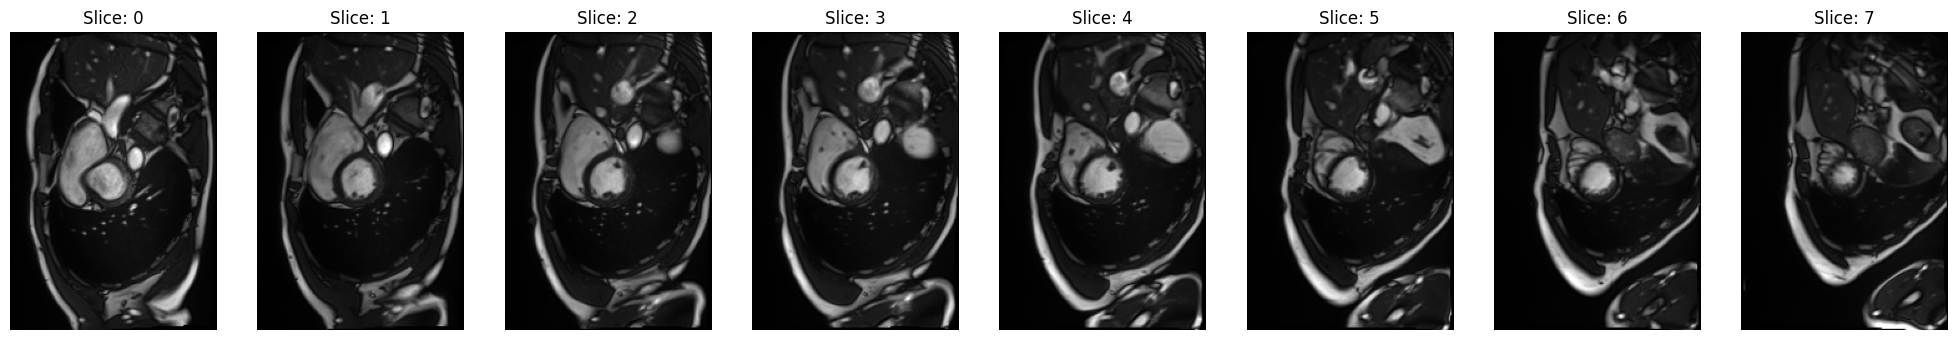

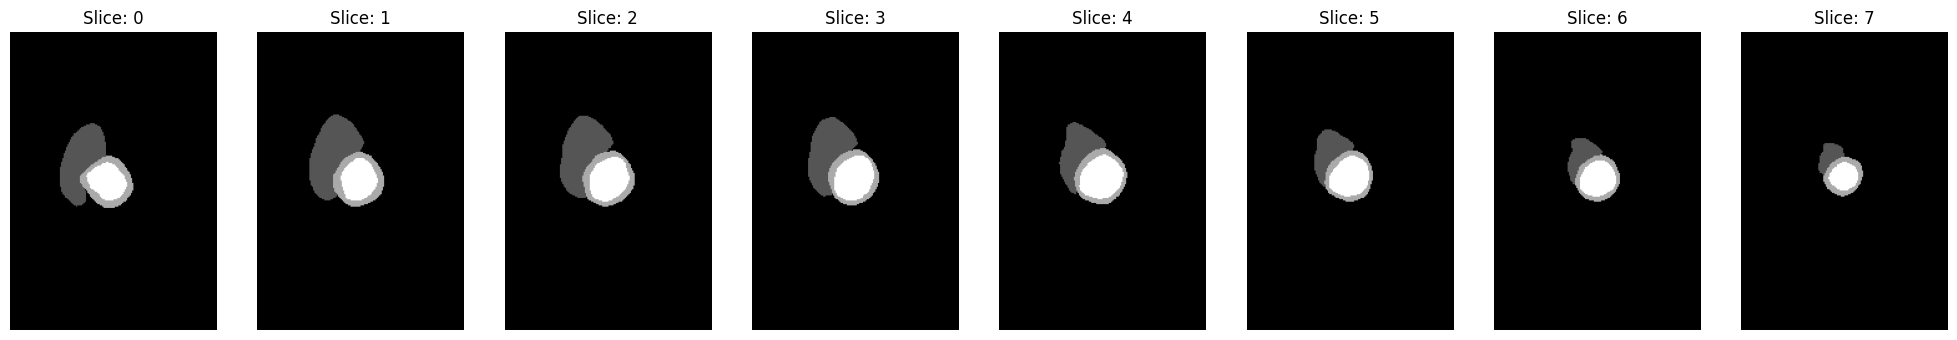

In [5]:
# Show images and masks of testing dataset
patient = 20

image = pre.nii_reader(images_test_ED[patient])
mask = pre.nii_reader(masks_test_ED[patient])

pre.visualize_image_mask(image, mask, image.shape[2])

In [7]:
# Extract each cavity of the heart for training data set
mask_rv_train, mask_myo_train, mask_lv_train = pre.heart_mask_extraction(masks_train_ED)

# Extract each cavity of the heart for testing data set
mask_rv_test, mask_myo_test, mask_lv_test = pre.heart_mask_extraction(masks_test_ED)